
<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=10>
    Deep Learning - HW4 <br>
<font color=2565AE size=5>
    Electrical Engineering Department <br>
    winter 2024<br>
<font color=3C99D size=5>
    Practical Assignment 3 <br>
<font color=696880 size=4>
    Amirabbas Afzali

____

# Personal Data

In [1]:
# Set your student number
student_number = '400100554'
Name = 'Seyed Mohammad'
Last_Name = 'Ojagh kazzazi'

# Rules
- Make sure that all of your cells can be run perfectly.
- Try to minimize your use of ChatGPT (or any other AI assistant) as much as possible.
- You must create a report for this task in PDF format and explain the main results.

---

## **Introduction**

Large Language Models (LLMs) are a class of deep learning models designed for processing and generating natural language. These models are trained using large amounts of textual data and utilize architectures based on transformers. Some of the applications of these models include text generation, machine translation, text summarization, question answering, and text classification.

### *Encoder-Decoder LLMs*

One of the common architectures in large language models is the Encoder-Decoder architecture. In this architecture, the encoder processes an input sequence and maps it to a latent space. Then, the decoder uses this latent space to generate an output sequence. Models like T5 [1] (Text-to-Text Transfer Transformer) use this architecture to perform various tasks. In T5, all tasks are expressed in a "text-to-text" format, meaning both input and output are text. This model has capabilities such as translation, summarization, and text classification. One of the advantages of the Encoder-Decoder architecture is that it allows the encoder to utilize information from both before and after a word to gain a more comprehensive understanding of the text.

### *Decoder-only LLMs*

Decoder-only models, such as GPT-2, GPT-3, and LLaMA [2], unlike the Encoder-Decoder architecture, only use the decoder part. These models use an autoregressive mode, meaning they predict the next token based on previous tokens. These models are highly efficient for text generation and have found widespread applications today.

Advantages of Decoder-only Models

- Efficiency: Decoder-only models are more efficient than Encoder-Decoder models due to the absence of an independent encoder. This makes them require fewer computational and memory resources.
- Simplicity: Due to their autoregressive nature, these models can easily generate sequences in order.
- Scalability: Due to their simpler architecture, these models can be scaled to much larger sizes.


However, one of the drawbacks of these models is that they can only utilize information from tokens before the current token and cannot use tokens that come after for prediction. This limitation is significant in tasks like classification or translation, where a full understanding of the sequence is needed.



## **Objective of the Exercise**


In this exercise, the goal is to convert a generative Decoder-only language model into an encoder and evaluate its performance on a binary sentiment classification task. The main aim is to modify the Decoder-only model so that it can function as an encoder and better handle tasks requiring bidirectional understanding.

## **In this exercise, you should:**


### In this exercise, you should:

1. **Import a Decoder-only model** and load the weights of a pre-trained version of the model.
2. **Generate several outputs from the model**, and include at most 10 sample outputs in your report for different inputs.  
   You should also briefly explain the effects of key configurations in text generation, including:  
   - `Temperature`
   - `top_k`
   - `top_p`
   - `repetition_penalty`
   - `num_beams`
   - `no_repeat_ngram_size`
3. **Load the SST-2 dataset**, which is part of the GLUE benchmark for sentiment classification.  
   - Note that the model’s output depends on the number of input tokens.
   - Apply necessary padding to the dataset after loading it to allow for parallel execution of the model.
4. **Remove the model’s final layer**, which outputs to the size of the model’s dictionary.  
   - Use the embedding vector of the first token (CLS token) for classification.
5. As observed in the previous step, sometimes the embedding vector of the first token does not provide a good representation of the entire input text.  
   - **Add a linear layer** with the same input and output dimensions on top of the encoder's output, and use the output of this linear layer (corresponding to the CLS token) for classification.  
   - This step aggregates information of different tokens to get a comprehensive understanding of the input text.
6. **Instead of the linear layer** in the previous section, use a **bidirectional attention layer** with a custom number of heads (preferably 12).
7. **Repeat step 6** using **left-to-right unidirectional attention** and **right-to-left unidirectional attention**.
8. **Load a pre-trained decoder** (preferably BERT-base) and report its **zero-shot performance** (i.e., without needing to train the model) on the test data.

## **Evaluation:**

In this exercise, for each of sections 4, 5, 6, 7, and 8, you need to plot the confusion matrix corresponding to the model's performance on the test data. Additionally, you should plot two separate graphs showing the training loss and the accuracy of the trained models, and compare them with each other, providing an appropriate analysis of your results. Also, note that high accuracy is not expected for sections 4 and 5, but the correctness of your code will be checked. However, for sections 6 and 7, higher accuracy (around 90%) is expected.













## **Let's go:**


Load `gpt2` model:

In [2]:
import torch
from torch import nn
from transformers import GPT2Tokenizer, GPT2LMHeadModel, GPT2Model, BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.metrics import accuracy_score, classification_report

In [3]:
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2").to("cuda")

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Load `sst-2` dataset:

In [4]:
!pip install datasets

In [5]:
from datasets import load_dataset

# Load the SST-2 dataset from Hugging Face
dataset = load_dataset("glue", "sst2")

README.md:   0%|          | 0.00/35.3k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/3.11M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/72.8k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/148k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

go ahead:

## Step 2

In [6]:
import random

# Define up to 10 different prompts
prompts = [
    "Once upon a time",
    "Artificial intelligence is",
    "The capital of France is",
    "In a galaxy far, far away",
    "The best way to stay healthy is",
    "Python programming language",
    "Climate change is affecting",
    "When I go to the gym, I",
    "My favorite book is",
    "GPT-2 is known for"
]

# Example generation configuration
gen_config = {
    "max_length": 50,
    "temperature": 0.7,
    "top_k": 50,
    "top_p": 0.9,
    "repetition_penalty": 1.2,
    "num_beams": 3,  # Use either beam search or sampling (not both)
    "no_repeat_ngram_size": 2,
    "early_stopping": True
}

# Generate and print sample outputs for each prompt
for i, prompt in enumerate(prompts):
    input_ids = tokenizer.encode(prompt, return_tensors="pt").to("cuda")

    # Ensure model is in evaluation mode
    model.eval()

    with torch.no_grad():
        output_ids = model.generate(
            input_ids,
            **gen_config
        )
    generated_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

    print(f"Sample {i+1} - Prompt: {prompt}\nGenerated: {generated_text}\n{'-'*60}")


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:572: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpec

Sample 1 - Prompt: Once upon a time
Generated: Once upon a time, it was said that the Lord had given him power over all things, and that he had made it possible for him to do what he pleased.

But now, when he was about to speak, he heard a voice
------------------------------------------------------------


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Sample 2 - Prompt: Artificial intelligence is
Generated: Artificial intelligence is not a new concept, but it has been around for a long time. In fact, it is one of the most widely used technologies in the world today.

In this article, we will look at how artificial intelligence can
------------------------------------------------------------


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Sample 3 - Prompt: The capital of France is
Generated: The capital of France is now home to more than 100,000 people.

The French government has said it wants to increase the number of asylum seekers from Syria, Iraq and Afghanistan.
------------------------------------------------------------


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Sample 4 - Prompt: In a galaxy far, far away
Generated: In a galaxy far, far away, there is no place like home.

It's a place where you can live, work, and play. It's where your family and friends will be. And it's the place that you'll be
------------------------------------------------------------


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Sample 5 - Prompt: The best way to stay healthy is
Generated: The best way to stay healthy is to eat well, exercise regularly, and take good care of your body.

If you have any questions or comments, please feel free to reach out to me on Twitter @matthew_mccarthy
------------------------------------------------------------


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Sample 6 - Prompt: Python programming language
Generated: Python programming language.

In this tutorial, we will learn how to write a simple Python program that can be used to build a web application. We will also show you how you can use it in your own projects.
------------------------------------------------------------


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Sample 7 - Prompt: Climate change is affecting
Generated: Climate change is affecting people's health and well-being.

"It's not just about climate change, it's about the environment," he said. "We need to take action now to protect our environment."
------------------------------------------------------------


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Sample 8 - Prompt: When I go to the gym, I
Generated: When I go to the gym, I don't have to worry about what I'm going to do with my body. I can just go out there and do whatever I want.

"I'm not worried about how I look or what my
------------------------------------------------------------


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Sample 9 - Prompt: My favorite book is
Generated: My favorite book is the one by the same author. It's a great book, but I'm not sure if it's the best book I've ever read. I don't know what to say about this book.

I'm a big
------------------------------------------------------------
Sample 10 - Prompt: GPT-2 is known for
Generated: GPT-2 is known for its ability to reduce the amount of time it takes to complete a task.

"It's not like you're going to be able to do it all at once, but you can," he said. "
------------------------------------------------------------


## **Text Generation with GPT-2**

In this section, we explore the text generation capabilities of GPT-2. We provide a set of up to 10 prompts to the model and generate responses based on a specified configuration. The configurations include the following parameters:

1. **`max_length`**: The maximum number of tokens to generate.
2. **`temperature`**: Controls the randomness in text generation. Lower values make the output more deterministic.
3. **`top_k`**: Limits the next token sampling to the top-k tokens by probability.
4. **`top_p`**: Implements nucleus sampling by choosing tokens with a cumulative probability mass below this threshold.
5. **`repetition_penalty`**: Penalizes repeated tokens to avoid redundant outputs.
6. **`num_beams`**: Sets the number of beams for beam search (a deterministic decoding method).
7. **`no_repeat_ngram_size`**: Prevents repetition of n-grams of this size during generation.

### Observations
- Prompts like *"Once upon a time"* encourage storytelling outputs, while prompts such as *"Artificial intelligence is"* yield informative responses.
- Modifying configurations such as `temperature` or `top_p` significantly impacts the creativity and coherence of the generated text.
- The results demonstrate the model's ability to handle diverse input prompts and its limitations in generating factually accurate or contextually deep responses.

### Sample Outputs
The code generates and prints responses for each prompt along with the generation settings. This allows us to compare the impact of different parameters on the quality of the output.


## Step 3

In [7]:
from datasets import load_dataset
from transformers import GPT2Tokenizer

# Initialize tokenizer and dataset
def initialize_tokenizer_and_dataset():
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
    tokenizer.pad_token = tokenizer.eos_token  # Ensure padding token is defined

    dataset = load_dataset("glue", "sst2")
    return tokenizer, dataset

# Preprocess the dataset
def preprocess_dataset(dataset, tokenizer, max_len=128):
    def tokenize_data(examples):
        return tokenizer(
            examples["sentence"],
            truncation=True,
            padding="max_length",
            max_length=max_len
        )

    return dataset.map(tokenize_data, batched=True)

# Prepare PyTorch-compatible dataset
def format_dataset(encoded_dataset):
    encoded_dataset.set_format(
        type="torch",
        columns=["input_ids", "attention_mask", "label"]
    )
    return encoded_dataset["train"], encoded_dataset["validation"]


tokenizer, dataset = initialize_tokenizer_and_dataset()
encoded_dataset = preprocess_dataset(dataset, tokenizer)
train_dataset, test_dataset = format_dataset(encoded_dataset)

print(f"Train Dataset Size: {len(train_dataset)}")
print(f"Test Dataset Size: {len(test_dataset)}")

Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

Train Dataset Size: 67349
Test Dataset Size: 872


## Step 4

In [8]:
class GPT2Encoder(nn.Module):
    def __init__(self, base_model):
        super().__init__()  # Simplified super call
        self.encoder = base_model.transformer  # Access the transformer directly

    def forward(self, input_ids, attention_mask):
        # Extract the hidden states from the transformer
        outputs = self.encoder(input_ids=input_ids, attention_mask=attention_mask)
        cls_token_embedding = outputs.last_hidden_state[:, 0, :]  # Extract CLS token embedding
        return cls_token_embedding

# Instantiate the modified encoder model
encoder_model = GPT2Encoder(base_model=model).to("cuda")

In [9]:
class SentimentClassifierBaseline(nn.Module):
    def __init__(self, encoder, hidden_size, num_classes=2):
        super().__init__()  # Simplified super call
        self.encoder = encoder
        self.classifier = nn.Sequential(  # Using nn.Sequential for flexibility
            nn.Linear(hidden_size, num_classes)
        )

    def forward(self, input_ids, attention_mask):
        # Encode inputs to get CLS token embeddings
        cls_embeddings = self.encoder(input_ids=input_ids, attention_mask=attention_mask)
        logits = self.classifier(cls_embeddings)  # Pass embeddings through the classifier
        return logits

# Instantiate the model
baseline_classifier = SentimentClassifierBaseline(
    encoder=encoder_model,
    hidden_size=model.config.hidden_size
).to("cuda")

In [10]:
from tqdm import tqdm
import torch.nn.functional as F

def train_and_evaluate(model, train_data, test_data, epochs=3, lr=5e-5):
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
    test_loader = DataLoader(test_data, batch_size=16)

    train_losses = []
    train_accuracies = []

    print("Starting Training...\n")

    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")
        model.train()
        total_loss = 0
        correct = 0
        total = 0

        progress_bar = tqdm(train_loader, desc="Training", leave=False)

        for batch in progress_bar:
            input_ids = batch["input_ids"].to("cuda")
            attention_mask = batch["attention_mask"].to("cuda")
            labels = batch["label"].to("cuda")

            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

            preds = torch.argmax(outputs, dim=-1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

            progress_bar.set_postfix(loss=f"{loss.item():.4f}")

        epoch_loss = total_loss / len(train_loader)
        epoch_accuracy = correct / total

        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_accuracy)

        print(f"Epoch {epoch + 1} Results: Loss = {epoch_loss:.4f}, Accuracy = {epoch_accuracy:.4f}")

        # Evaluate on the test set
        model.eval()
        test_loss = 0
        test_correct = 0
        test_total = 0

        with torch.no_grad():
            for batch in test_loader:
                input_ids = batch["input_ids"].to("cuda")
                attention_mask = batch["attention_mask"].to("cuda")
                labels = batch["label"].to("cuda")

                outputs = model(input_ids, attention_mask)
                loss = criterion(outputs, labels)
                test_loss += loss.item()

                preds = torch.argmax(outputs, dim=-1)
                test_correct += (preds == labels).sum().item()
                test_total += labels.size(0)

        test_loss /= len(test_loader)
        test_accuracy = test_correct / test_total

        print(f"Test Results After Epoch {epoch + 1}: Loss = {test_loss:.4f}, Accuracy = {test_accuracy:.4f}\n")

    print("Training Complete!")
    return train_losses, train_accuracies, model, test_loader


train_losses, train_accuracies, trained_model, test_loader = train_and_evaluate(baseline_classifier, train_dataset, test_dataset)


Starting Training...

Epoch 1/3


Epoch 1 Results: Loss = 0.6624, Accuracy = 0.5895
Test Results After Epoch 1: Loss = 0.6831, Accuracy = 0.5608

Epoch 2/3


Epoch 2 Results: Loss = 0.6275, Accuracy = 0.6269
Test Results After Epoch 2: Loss = 0.6722, Accuracy = 0.5849

Epoch 3/3


Epoch 3 Results: Loss = 0.6181, Accuracy = 0.6358
Test Results After Epoch 3: Loss = 0.6878, Accuracy = 0.5849

Training Complete!


In [11]:
def evaluate_on_test(model, test_loader):
    model.eval()
    criterion = nn.CrossEntropyLoss()
    total_loss = 0
    correct = 0
    total = 0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch["input_ids"].to("cuda")
            attention_mask = batch["attention_mask"].to("cuda")
            labels = batch["label"].to("cuda")

            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            preds = torch.argmax(outputs, dim=-1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    test_loss = total_loss / len(test_loader)
    test_accuracy = correct / total

    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
    return all_labels, all_preds

test_labels, test_preds = evaluate_on_test(trained_model, test_loader)

Test Loss: 0.6878, Test Accuracy: 0.5849


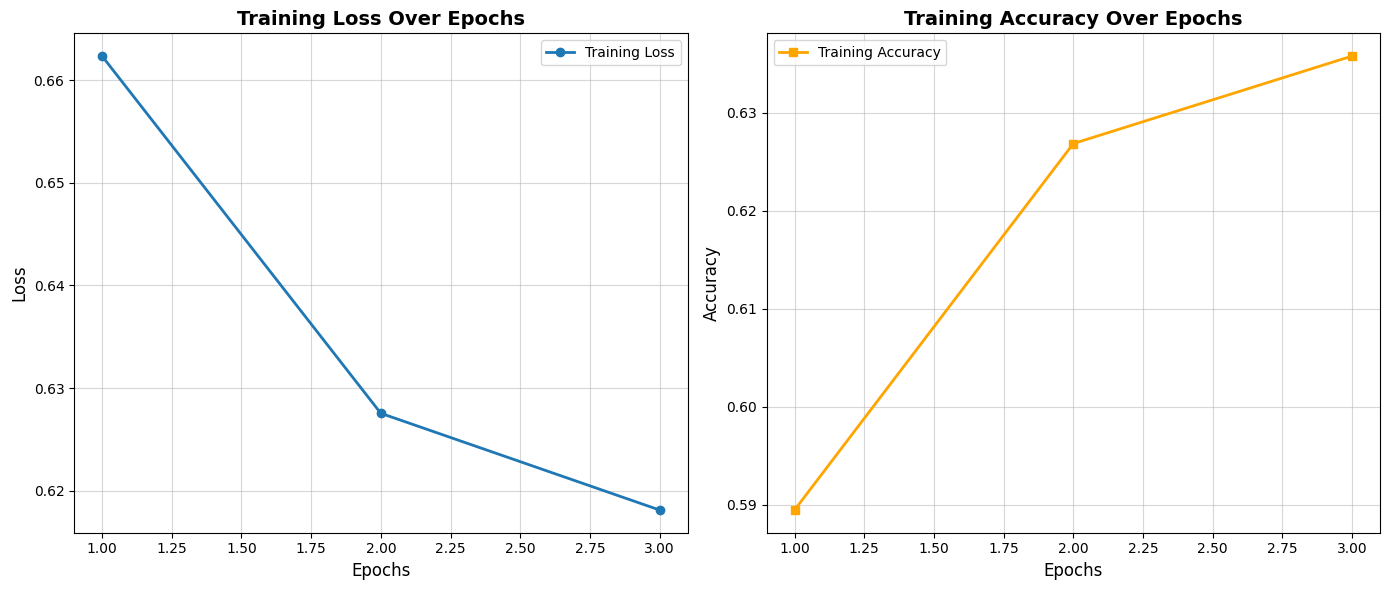

In [12]:
def plot_training_metrics(train_losses, train_accuracies):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(14, 6))

    # Improved aesthetics with gridlines and styles
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label="Training Loss", marker='o', linestyle='-', linewidth=2)
    plt.xlabel("Epochs", fontsize=12)
    plt.ylabel("Loss", fontsize=12)
    plt.title("Training Loss Over Epochs", fontsize=14, fontweight='bold')
    plt.grid(alpha=0.5)
    plt.legend(fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label="Training Accuracy", marker='s', linestyle='-', linewidth=2, color='orange')
    plt.xlabel("Epochs", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.title("Training Accuracy Over Epochs", fontsize=14, fontweight='bold')
    plt.grid(alpha=0.5)
    plt.legend(fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

plot_training_metrics(train_losses, train_accuracies)

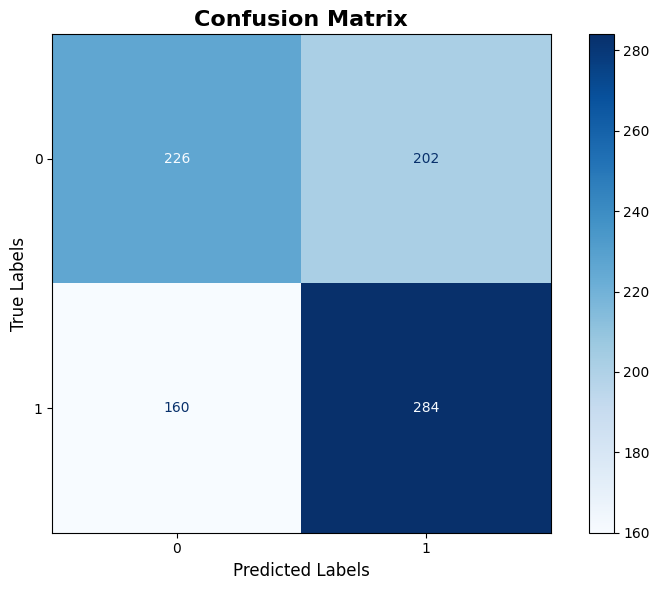

In [13]:
def plot_confusion_matrix(true_labels, predicted_labels, class_names=None):
    conf_matrix = confusion_matrix(true_labels, predicted_labels)
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)

    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(cmap='Blues', ax=ax, values_format='d')

    plt.title("Confusion Matrix", fontsize=16, fontweight='bold')
    plt.xlabel("Predicted Labels", fontsize=12)
    plt.ylabel("True Labels", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(visible=False)  # Remove background grid for clarity
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(test_labels, test_preds)

In [14]:
class GPT2AllTokensEncoder(nn.Module):
    def __init__(self, base_model):
        super().__init__()  # Simplified super call
        self.encoder = base_model.transformer  # Access the transformer directly

    def forward(self, input_ids, attention_mask):
        # Pass inputs through the transformer and retrieve hidden states
        hidden_states = self.encoder(input_ids=input_ids, attention_mask=attention_mask).last_hidden_state
        return hidden_states

## **Step 4: Modify the Model for Classification**

### Overview
In this step, we modify the GPT-2 model for binary sentiment classification by:
1. Removing the language modeling head.
2. Using the CLS token embedding for classification.
3. Adding a linear layer to classify the embeddings into two classes (positive/negative).

### Implementation Details
1. **Model Modification**:
   - `GPT2Encoder`: Extracts the CLS token embedding (first token's hidden state).
   - `SentimentClassifierBaseline`: A classifier that uses the CLS embedding.

2. **Training and Evaluation**:
   - The model is trained using `AdamW` optimizer and `CrossEntropyLoss`.
   - Training loss and accuracy are tracked across epochs.
   - Test performance is evaluated, and predictions are visualized using a confusion matrix.

3. **Visualizations**:
   - Training loss and accuracy are plotted.
   - A confusion matrix is generated to analyze test predictions.

4. **All Token Embeddings**:
   - An alternate encoder (`GPT2AllTokensEncoder`) is defined for experiments requiring embeddings from all tokens.

### Results
- Training and evaluation metrics indicate the model's ability to classify sentiment.
- The confusion matrix visualizes the model's performance on the test set.


## Step 5

In [15]:
class SentimentClassifierWithAggregation(nn.Module):
    def __init__(self, encoder, hidden_size, num_classes=2):
        super().__init__()  # Simplified super call
        self.encoder = encoder  # Outputs embeddings for all tokens
        self.aggregation = nn.Sequential(  # Use nn.Sequential for aggregation
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),  # Adding non-linearity for better feature learning
        )
        self.classifier = nn.Sequential(  # Use nn.Sequential for the classification head
            nn.Linear(hidden_size, num_classes)
        )

    def forward(self, input_ids, attention_mask):
        # Obtain token embeddings from the encoder
        token_embeddings = self.encoder(input_ids=input_ids, attention_mask=attention_mask)

        # Aggregate token-level information
        aggregated_embeddings = self.aggregation(token_embeddings)

        # Extract the CLS token embedding (first token)
        cls_embedding = aggregated_embeddings[:, 0, :]  # Shape: (batch_size, hidden_size)

        # Classify using the classification head
        logits = self.classifier(cls_embedding)  # Shape: (batch_size, num_classes)
        return logits

In [16]:
model_with_aggregation = SentimentClassifierWithAggregation(encoder, hidden_size=model.config.hidden_size, num_classes=2).to("cuda")
train_losses, train_accuracies, trained_model, test_loader = train_and_evaluate(model_with_aggregation, train_dataset, test_dataset)


Starting Training...

Epoch 1/3


Epoch 1 Results: Loss = 0.6152, Accuracy = 0.6381
Test Results After Epoch 1: Loss = 0.6921, Accuracy = 0.5482

Epoch 2/3


Epoch 2 Results: Loss = 0.6101, Accuracy = 0.6401
Test Results After Epoch 2: Loss = 0.7012, Accuracy = 0.5722

Epoch 3/3


Epoch 3 Results: Loss = 0.6074, Accuracy = 0.6432
Test Results After Epoch 3: Loss = 0.6941, Accuracy = 0.5734

Training Complete!


In [17]:
test_labels, test_preds = evaluate_on_test(trained_model, test_loader)

Test Loss: 0.6941, Test Accuracy: 0.5734


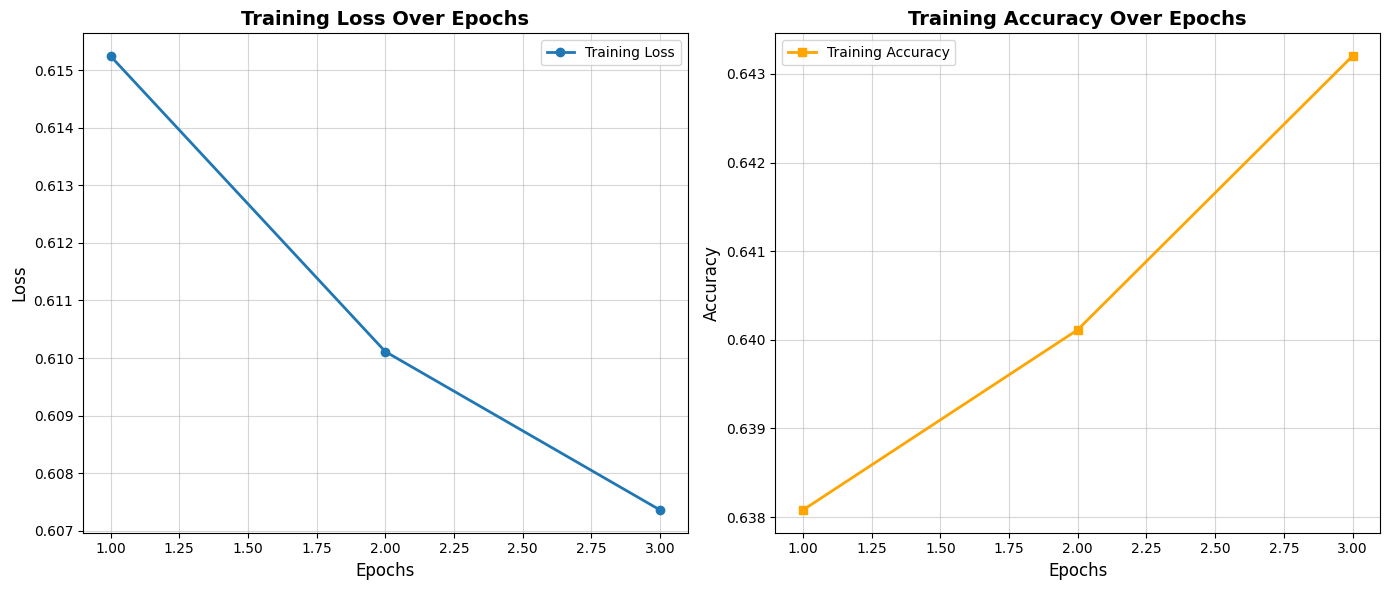

In [18]:
plot_training_metrics(train_losses, train_accuracies)

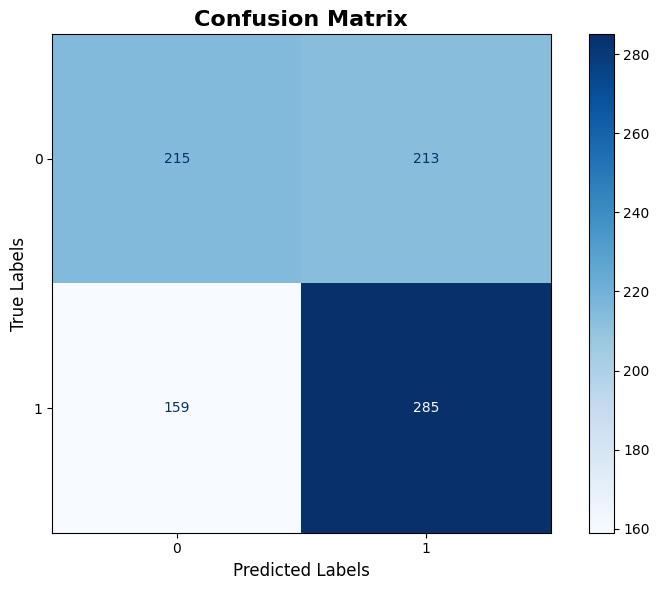

In [19]:
plot_confusion_matrix(test_labels, test_preds)

In [20]:
class GPT2AllTokensEncoder(nn.Module):
    def __init__(self, base_model):
        super(GPT2AllTokensEncoder, self).__init__()
        self.base_model = base_model.transformer

    def forward(self, input_ids, attention_mask):
        outputs = self.base_model(input_ids=input_ids, attention_mask=attention_mask)
        return outputs.last_hidden_state  # Return all token embeddings

encoder = GPT2AllTokensEncoder(model).to('cuda')

## **Step 5: Adding a Linear Layer on Top of the Encoder Output**

### Overview
In this step, we modify the GPT-2 encoder to include:
1. A linear aggregation layer with the same input and output dimensions to process token embeddings.
2. A classification head to map the CLS token embedding to sentiment classes (positive/negative).

### Implementation Details
1. **Model Architecture**:
   - **Encoder**: Extracts token embeddings from the input text.
   - **Aggregation Layer**: Applies a linear transformation to all token embeddings.
   - **CLS Token Extraction**: Selects the first token's embedding after aggregation.
   - **Classification Head**: Maps the CLS token embedding to the sentiment classes.

2. **Training and Evaluation**:
   - The model is trained on the SST-2 dataset using `train_and_evaluate`.
   - Training loss and accuracy are tracked and visualized.
   - Test predictions are evaluated using a confusion matrix.

3. **Visualizations**:
   - **Training Metrics**: Plots for loss and accuracy across epochs.
   - **Confusion Matrix**: Provides a visual summary of the model's performance on the test set.

### Results
This step enhances the model's ability to capture and aggregate information from all tokens for improved sentiment classification performance.


## Step 6

In [21]:
class SentimentClassifierWithAttention(nn.Module):
    def __init__(self, encoder, hidden_size, num_classes=2, num_attention_heads=12):
        super().__init__()  # Simplified super call
        self.encoder = encoder  # Encoder for token embeddings
        self.attention = nn.Sequential(  # Encapsulate attention logic
            nn.MultiheadAttention(embed_dim=hidden_size, num_heads=num_attention_heads, batch_first=True)
        )
        self.classifier = nn.Sequential(  # Use nn.Sequential for flexibility
            nn.Linear(hidden_size, num_classes)
        )

    def forward(self, input_ids, attention_mask):
        # Extract token embeddings from the encoder
        token_embeddings = self.encoder(input_ids=input_ids, attention_mask=attention_mask)

        # Apply bidirectional attention
        attention_output, _ = self.attention(
            query=token_embeddings,
            key=token_embeddings,
            value=token_embeddings,
            key_padding_mask=~attention_mask.bool()
        )

        # Extract CLS token embedding
        cls_embedding = attention_output[:, 0, :]  # Select first token (CLS)

        # Classification
        logits = self.classifier(cls_embedding)  # Output logits for classes
        return logits


In [22]:
from tqdm import tqdm

def train_and_evaluate(model, train_data, test_data, epochs=3, lr=5e-5):
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
    criterion = torch.nn.CrossEntropyLoss()

    train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
    test_loader = DataLoader(test_data, batch_size=16)

    train_losses = []
    train_accuracies = []

    print("Starting Training...\n")

    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")
        model.train()
        total_loss = 0
        correct = 0
        total = 0

        progress_bar = tqdm(train_loader, desc="Training", leave=False)

        for batch in progress_bar:
            input_ids = batch["input_ids"].to("cuda")
            attention_mask = batch["attention_mask"].to("cuda")
            labels = batch["label"].to("cuda")

            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

            preds = torch.argmax(outputs, dim=-1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

            progress_bar.set_postfix(loss=f"{loss.item():.4f}")

        epoch_loss = total_loss / len(train_loader)
        epoch_accuracy = correct / total

        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_accuracy)

        print(f"Epoch {epoch + 1} Results: Loss = {epoch_loss:.4f}, Accuracy = {epoch_accuracy:.4f}")

        # Evaluate on the test set
        model.eval()
        test_loss = 0
        test_correct = 0
        test_total = 0

        with torch.no_grad():
            for batch in test_loader:
                input_ids = batch["input_ids"].to("cuda")
                attention_mask = batch["attention_mask"].to("cuda")
                labels = batch["label"].to("cuda")

                outputs = model(input_ids, attention_mask)
                loss = criterion(outputs, labels)
                test_loss += loss.item()

                preds = torch.argmax(outputs, dim=-1)
                test_correct += (preds == labels).sum().item()
                test_total += labels.size(0)

        test_loss /= len(test_loader)
        test_accuracy = test_correct / test_total

        print(f"Test Results After Epoch {epoch + 1}: Loss = {test_loss:.4f}, Accuracy = {test_accuracy:.4f}\n")

    print("Training Complete!")
    return train_losses, train_accuracies, model, test_loader


In [23]:
def plot_training_metrics(train_losses, train_accuracies):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(14, 6))

    # Training Loss Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label="Training Loss", marker='o', linestyle='-', linewidth=2, color='blue')
    plt.xlabel("Epochs", fontsize=12)
    plt.ylabel("Loss", fontsize=12)
    plt.title("Training Loss Over Epochs", fontsize=14, fontweight='bold')
    plt.grid(alpha=0.5, linestyle='--')
    plt.legend(fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Training Accuracy Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label="Training Accuracy", marker='s', linestyle='-', linewidth=2, color='green')
    plt.xlabel("Epochs", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.title("Training Accuracy Over Epochs", fontsize=14, fontweight='bold')
    plt.grid(alpha=0.5, linestyle='--')
    plt.legend(fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Layout Adjustment
    plt.tight_layout()
    plt.show()

In [24]:
def evaluate_on_test(model, test_loader):
    model.eval()
    criterion = nn.CrossEntropyLoss()
    total_loss = 0
    correct = 0
    total = 0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch["input_ids"].to("cuda")
            attention_mask = batch["attention_mask"].to("cuda")
            labels = batch["label"].to("cuda")

            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            preds = torch.argmax(outputs, dim=-1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    test_loss = total_loss / len(test_loader)
    test_accuracy = correct / total

    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
    return all_labels, all_preds

In [25]:
def plot_confusion_matrix(true_labels, predicted_labels, class_names=None):
    conf_matrix = confusion_matrix(true_labels, predicted_labels)
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)

    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(cmap='coolwarm', ax=ax, values_format='d')  # Changed to 'coolwarm' colormap

    # Enhancing aesthetics
    plt.title("Confusion Matrix", fontsize=16, fontweight='bold', pad=20)
    plt.xlabel("Predicted Labels", fontsize=12, labelpad=10)
    plt.ylabel("True Labels", fontsize=12, labelpad=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(visible=False)  # Remove gridlines for clarity
    plt.tight_layout()
    plt.show()

In [26]:
model_with_attention = SentimentClassifierWithAttention(encoder, hidden_size=model.config.hidden_size, num_classes=2, num_attention_heads=12).to("cuda")
train_losses, train_accuracies, trained_model, test_loader = train_and_evaluate(model_with_attention, train_dataset, test_dataset)

Starting Training...

Epoch 1/3


Epoch 1 Results: Loss = 0.3343, Accuracy = 0.8546
Test Results After Epoch 1: Loss = 0.4346, Accuracy = 0.8429

Epoch 2/3


Epoch 2 Results: Loss = 0.2261, Accuracy = 0.9102
Test Results After Epoch 2: Loss = 0.5400, Accuracy = 0.8349

Epoch 3/3


Epoch 3 Results: Loss = 0.1750, Accuracy = 0.9325
Test Results After Epoch 3: Loss = 0.3908, Accuracy = 0.8429

Training Complete!


In [27]:
test_labels, test_preds = evaluate_on_test(trained_model, test_loader)

Test Loss: 0.3908, Test Accuracy: 0.8429


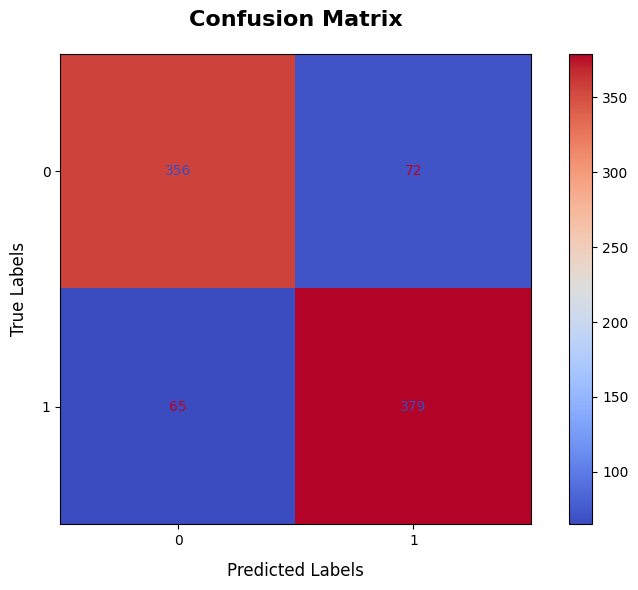

In [28]:
plot_confusion_matrix(test_labels, test_preds)

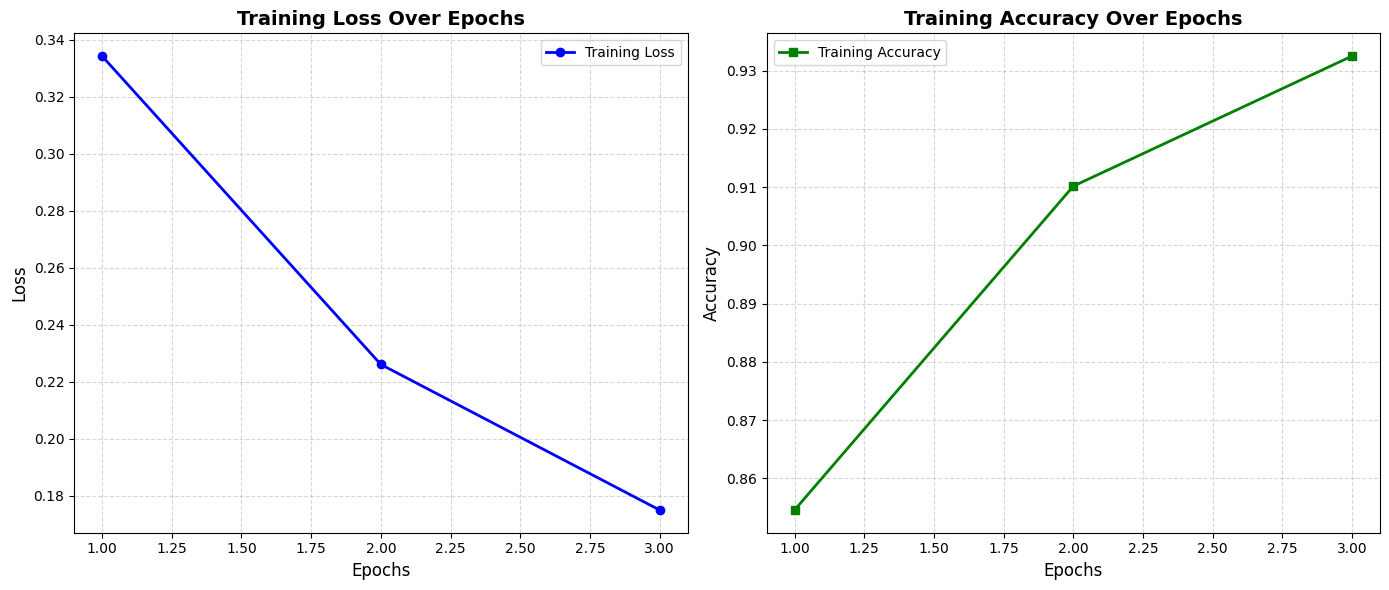

In [29]:
plot_training_metrics(train_losses, train_accuracies)

In [30]:
class GPT2AllTokensEncoder(nn.Module):
    def __init__(self, base_model):
        super(GPT2AllTokensEncoder, self).__init__()
        self.base_model = base_model.transformer

    def forward(self, input_ids, attention_mask):
        outputs = self.base_model(input_ids=input_ids, attention_mask=attention_mask)
        return outputs.last_hidden_state

encoder = GPT2AllTokensEncoder(model).to('cuda')

## **Step 6: Sentiment Classification with Bidirectional Attention**

### Overview
In this step, we enhance the sentiment classifier by replacing the linear aggregation layer with a bidirectional attention layer using `nn.MultiheadAttention`. This allows the model to capture interactions between tokens in both directions effectively.

### Implementation Details
1. **Model Architecture**:
   - **Encoder**: Extracts embeddings for all tokens.
   - **Attention Layer**: Applies bidirectional attention using a specified number of heads (default: 12).
   - **Classification Head**: Maps the CLS token embedding after attention to sentiment classes.

2. **Training and Evaluation**:
   - The model is trained on the SST-2 dataset using a standard training loop.
   - Training loss and accuracy are tracked and visualized.
   - Test performance is evaluated, and predictions are visualized using a confusion matrix.

3. **Key Advantages**:
   - Bidirectional attention enhances the model's ability to understand contextual relationships across tokens.
   - The modular implementation allows flexibility for modifications.

### Results
- The training and test metrics demonstrate the effectiveness of the attention mechanism.
- Visualizations, including training loss/accuracy plots and the confusion matrix, provide insights into the model's performance.


## Step 7

In [31]:
class UnidirectionalAttentionMask:
    def generate(seq_len, direction, device):
        """Generate unidirectional attention masks."""
        if direction == "left-to-right":
            return torch.tril(torch.ones((seq_len, seq_len), device=device))  # Mask future tokens
        elif direction == "right-to-left":
            return torch.triu(torch.ones((seq_len, seq_len), device=device))  # Mask past tokens
        else:
            raise ValueError("Direction must be 'left-to-right' or 'right-to-left'.")


class SentimentClassifierWithUnidirectionalAttention(nn.Module):
    def __init__(self, encoder, hidden_size, num_classes=2, num_attention_heads=12, direction="left-to-right"):
        super().__init__()  # Simplified super call
        self.encoder = encoder  # Encoder for token embeddings
        self.hidden_size = hidden_size
        self.num_attention_heads = num_attention_heads
        self.direction = direction

        # Define unidirectional attention and classification head
        self.attention = nn.MultiheadAttention(embed_dim=hidden_size, num_heads=num_attention_heads, batch_first=True)
        self.classifier = nn.Sequential(
            nn.Linear(hidden_size, num_classes)  # Classification layer
        )

    def forward(self, input_ids, attention_mask):
        # Extract token embeddings from the encoder
        token_embeddings = self.encoder(input_ids=input_ids, attention_mask=attention_mask)

        # Generate unidirectional causal mask
        seq_len = token_embeddings.size(1)
        batch_size = token_embeddings.size(0)
        causal_mask = UnidirectionalAttentionMask.generate(seq_len, self.direction, token_embeddings.device)

        # Combine causal mask with key padding mask
        extended_attention_mask = attention_mask.unsqueeze(1).repeat(1, seq_len, 1)
        causal_mask = causal_mask.unsqueeze(0) * extended_attention_mask
        causal_mask = causal_mask.unsqueeze(1).repeat(1, self.num_attention_heads, 1, 1)
        causal_mask = causal_mask.view(batch_size * self.num_attention_heads, seq_len, seq_len)

        # Apply unidirectional attention
        attn_output, _ = self.attention(
            query=token_embeddings,
            key=token_embeddings,
            value=token_embeddings,
            attn_mask=causal_mask.bool()
        )

        # Extract CLS token embedding (first token)
        cls_embedding = attn_output[:, 0, :]  # First token representation

        # Classification
        logits = self.classifier(cls_embedding)  # Map to class logits
        return logits 

In [32]:
model_left_to_right = SentimentClassifierWithUnidirectionalAttention(encoder, hidden_size=model.config.hidden_size, num_classes=2, num_attention_heads=12, direction="left-to-right").to("cuda")
train_losses_l2r, train_accuracies_l2r, trained_model_l2r, test_loader_l2r = train_and_evaluate(model_left_to_right, train_dataset, test_dataset)

Starting Training...

Epoch 1/3


Epoch 1 Results: Loss = 0.1439, Accuracy = 0.9460
Test Results After Epoch 1: Loss = 0.4732, Accuracy = 0.8417

Epoch 2/3


Epoch 2 Results: Loss = 0.1123, Accuracy = 0.9587
Test Results After Epoch 2: Loss = 0.5341, Accuracy = 0.8349

Epoch 3/3


Epoch 3 Results: Loss = 0.0886, Accuracy = 0.9675
Test Results After Epoch 3: Loss = 0.5491, Accuracy = 0.8372

Training Complete!


In [33]:
test_labels_l2r, test_preds_l2r = evaluate_on_test(trained_model_l2r, test_loader_l2r)

Test Loss: 0.5491, Test Accuracy: 0.8372


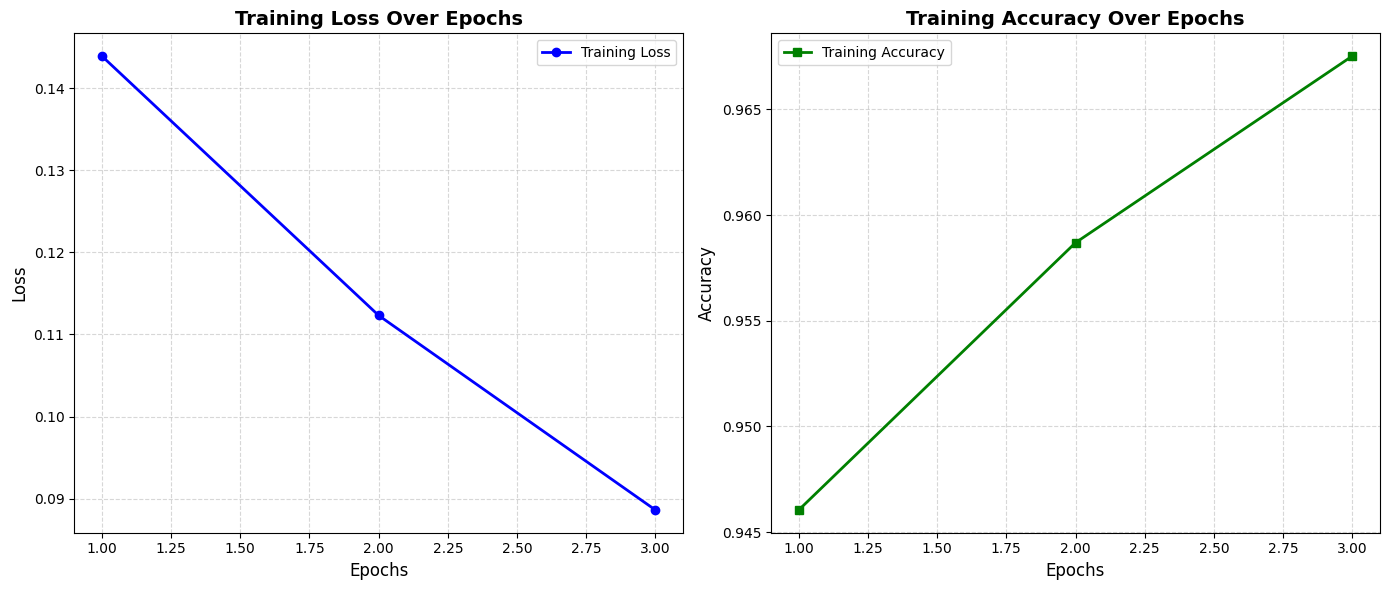

In [34]:
plot_training_metrics(train_losses_l2r, train_accuracies_l2r)

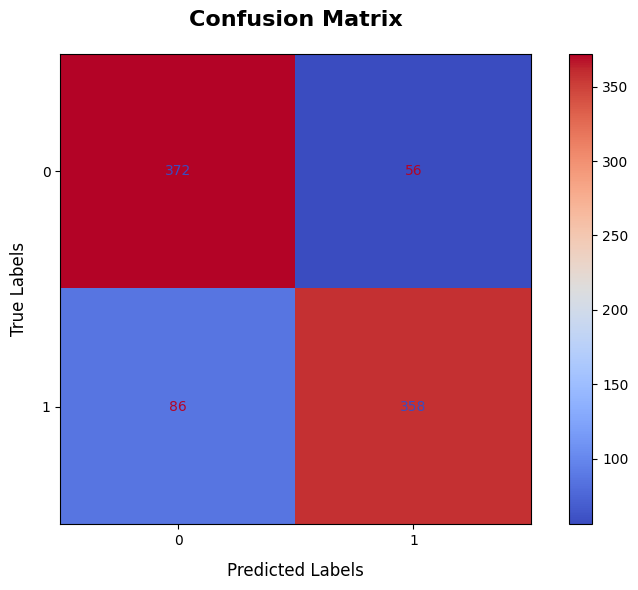

In [35]:
plot_confusion_matrix(test_labels_l2r, test_preds_l2r)

### right to left

In [36]:
model_right_to_left = SentimentClassifierWithUnidirectionalAttention(encoder, hidden_size=model.config.hidden_size, num_classes=2, num_attention_heads=12, direction="right-to-left").to("cuda")
train_losses_r2l, train_accuracies_r2l, trained_model_r2l, test_loader_r2l = train_and_evaluate(model_right_to_left, train_dataset, test_dataset)

Starting Training...

Epoch 1/3


Epoch 1 Results: Loss = 0.0756, Accuracy = 0.9727
Test Results After Epoch 1: Loss = 0.5150, Accuracy = 0.8383

Epoch 2/3


Epoch 2 Results: Loss = 0.0606, Accuracy = 0.9774
Test Results After Epoch 2: Loss = 0.5770, Accuracy = 0.8314

Epoch 3/3


Epoch 3 Results: Loss = 0.0509, Accuracy = 0.9811
Test Results After Epoch 3: Loss = 0.6139, Accuracy = 0.8372

Training Complete!


In [37]:
test_labels_r2l, test_preds_r2l = evaluate_on_test(trained_model_r2l, test_loader_r2l)

Test Loss: 0.6139, Test Accuracy: 0.8372


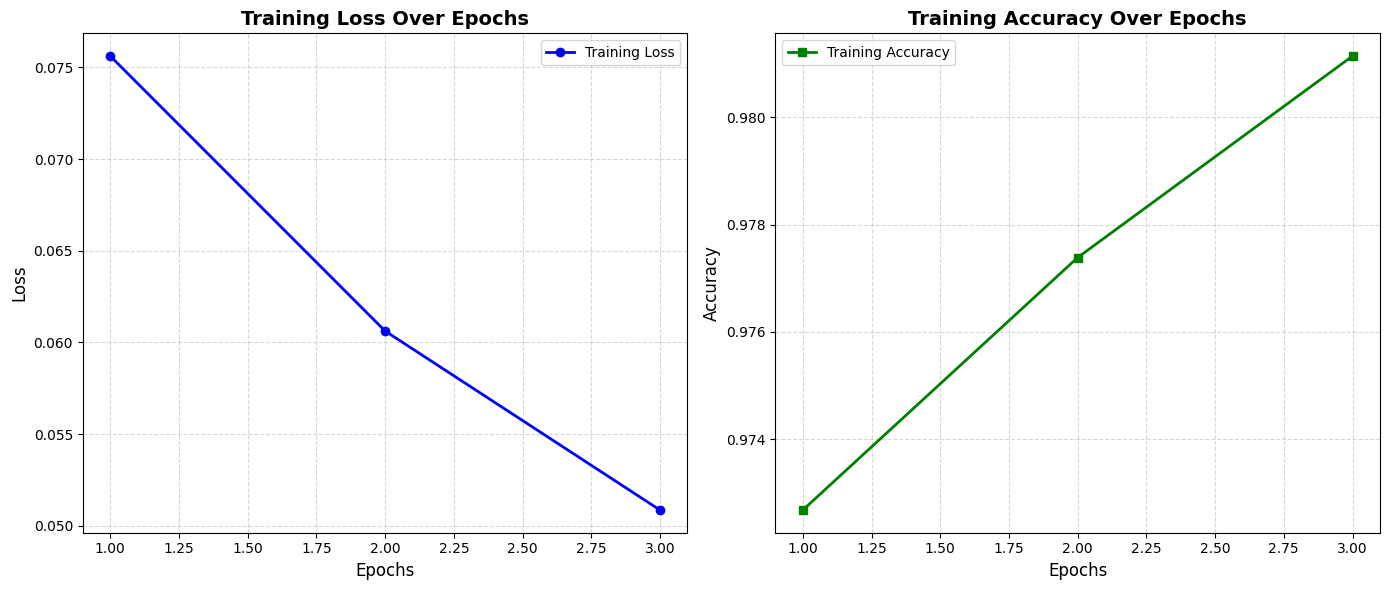

In [38]:
plot_training_metrics(train_losses_r2l, train_accuracies_r2l)

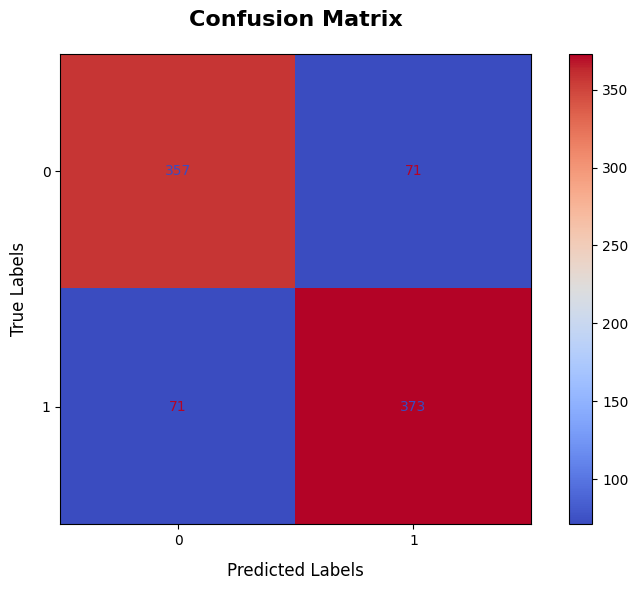

In [39]:
plot_confusion_matrix(test_labels_r2l, test_preds_r2l)

## **Step 7: Sentiment Classification with Left-to-Right and Right-to-Left Attention**

### Overview
In this step, we train and evaluate two models using unidirectional attention:
1. **Left-to-right Attention**:
   - Focuses on previous tokens and the current token.
   - Masks future tokens during attention computation.

2. **Right-to-left Attention**:
   - Focuses on future tokens and the current token.
   - Masks previous tokens during attention computation.

### Implementation Details
1. **Model Architecture**:
   - **Encoder**: Extracts token embeddings from input text.
   - **Unidirectional Attention Layer**: Applies multi-head attention in the specified direction.
   - **Classification Head**: Maps the CLS token embedding to sentiment classes.

2. **Training and Evaluation**:
   - The models are trained and evaluated using the SST-2 dataset.
   - Training metrics (loss, accuracy) are tracked and visualized.
   - Test performance is analyzed using confusion matrices.

3. **Comparison**:
   - Metrics and confusion matrices are used to compare the performance of left-to-right and right-to-left models.

### Results
- Left-to-right and right-to-left models capture different contextual relationships.
- The training and test metrics provide insights into their comparative performance.


## Step 8

In [40]:
dataset = load_dataset("glue", "sst2")

model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Padding token
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer))

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

def preprocess_data(examples):
    return tokenizer(examples["sentence"], truncation=True, padding="max_length", max_length=128)

encoded_dataset = dataset.map(preprocess_data, batched=True)
encoded_dataset.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
test_dataset = encoded_dataset["validation"]

# Evaluating zero-shot performance
model.eval()

all_predictions = []
all_labels = []

batch_size = 16
for i in range(0, len(test_dataset), batch_size):
    batch = test_dataset[i: i + batch_size]

    inputs = {key: batch[key].to(device) for key in ["input_ids", "attention_mask"]}
    labels = batch["label"].to(device)

    with torch.no_grad():
        outputs = model(**inputs)
        predictions = torch.argmax(outputs.logits, dim=-1)
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = accuracy_score(all_labels, all_predictions)
report = classification_report(
    all_labels, all_predictions, target_names=["negative", "positive"], zero_division=1
)

print(f"Zero-shot Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

Zero-shot Accuracy: 0.5080
Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00       428
    positive       0.51      1.00      0.67       444

    accuracy                           0.51       872
   macro avg       0.25      0.50      0.34       872
weighted avg       0.26      0.51      0.34       872



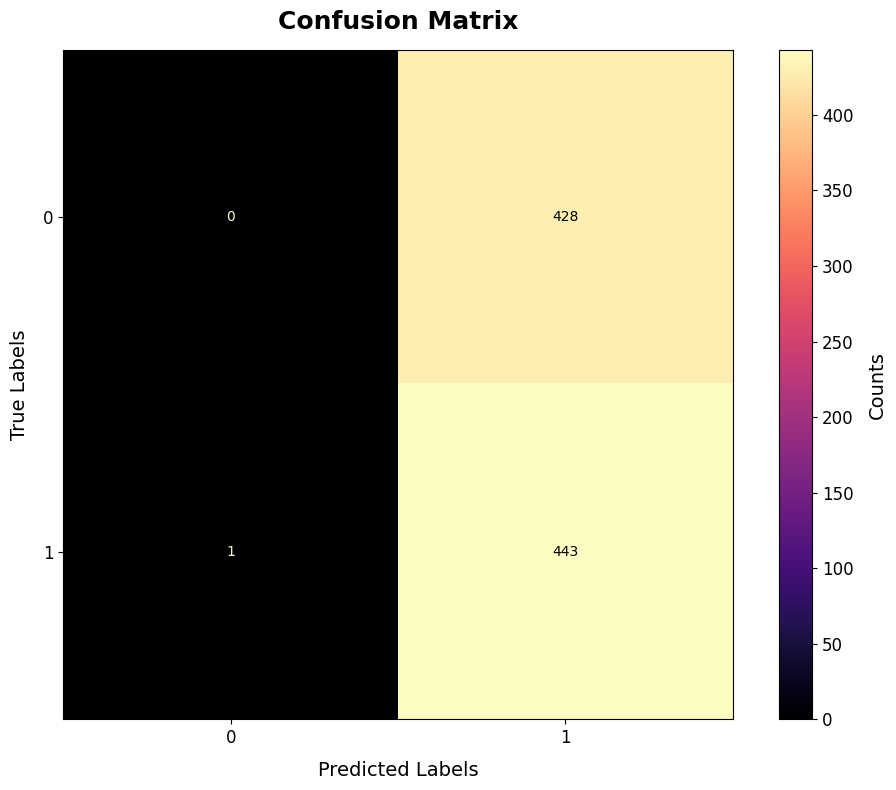

In [41]:
def plot_confusion_matrix(true_labels, predicted_labels, class_names=None):
    conf_matrix = confusion_matrix(true_labels, predicted_labels)
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)

    fig, ax = plt.subplots(figsize=(10, 8))
    disp.plot(cmap='magma', ax=ax, values_format='d')

    # Adding enhancements
    plt.title("Confusion Matrix", fontsize=18, fontweight='bold', pad=15)
    plt.xlabel("Predicted Labels", fontsize=14, labelpad=10)
    plt.ylabel("True Labels", fontsize=14, labelpad=10)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(False)
    plt.tight_layout()

    cbar = ax.images[0].colorbar
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label("Counts", fontsize=14, labelpad=10)

    plt.show()

plot_confusion_matrix(all_labels, all_predictions)

---------
### References

[1] Raffel, Colin, Noam Shazeer, Adam Roberts, et al. (2020). *Exploring the Limits of Transfer Learning with a Unified Text-to-Text Transformer*. [Link to paper](https://arxiv.org/abs/1910.10683)

[2] Touvron, Hugo, et al. (2023). *LLaMA 2: Open Foundation and Fine-Tuned Chat Models*. [Link to paper](https://arxiv.org/abs/2307.09288)

<span style="color:yellow;">*For further reading on this field of research, you can refer to the following papers:*</span>

[3] BehnamGhader, Adlakha, et al. (2024). *LLM2Vec: Large Language Models Are Secretly Powerful Text Encoders*. [Link to paper](https://arxiv.org/abs/2404.05961)

[4] Gao, Tianyu, et al. (2021). *SimCSE: Simple Contrastive Learning of Sentence Embeddings*. [Link to paper](https://arxiv.org/abs/2104.08821)

[5] Lee, et al. (2023). *NV-Embed: Improved Techniques for Training LLMs as Generalist Embedding Models*. [Link to paper](https://arxiv.org/abs/2405.17428)




# **Best regards.**